# Extrapolación de Richardson.

Teniendo en cuenta los puntos de datos uniformemente espaciados:

|   x   |    0   |   0.1  |   0.2  |   0.3  |   0.4  |
|:-----:|:------:|:------:|:------:|:------:|:------:|
| f (x) | 0.0000 | 0.0819 | 0.1341 | 0.1646 | 0.1797 |


Calcula $f^{\prime} (x)$ y $f^{\prime \prime} (x)$ en $x = 0$ y $x = 0.2$, usando la aproximación por diferencias finitas de orden $O (h^{2})$.

In [ ]:
from moduloDiferencias import dif_adelante_h2, \
                                ddif_adelante_h2, \
                                dif_central_puntos, \
                                ddif_central_puntos, \
                                extra_Richardson

x = [0, 0.1, 0.2, 0.3, 0.4]
fx = [0.0000, 0.0819, 0.1341, 0.1646, 0.1797]

h = 0.1

# Derivadas para x = 0
pderivada = dif_adelante_h2(fx[0], fx[1], fx[2], h)
sderivada = ddif_adelante_h2(fx[0], fx[1], fx[2], fx[3], h)

# Derivadas para x =0.2
pderivada2 = dif_central_puntos(fx[1], fx[3], h)
sderivada2 = ddif_central_puntos(fx[1], fx[2], fx[3], h)

print('Aproximación a la derivada por diferencias hacia adelante = {0}'.format(pderivada))
print('\nAproximación a la segunda derivada por diferencias hacia adelante = {0}'.format(round(sderivada, 4)))
print('\nAproximación a la derivada por diferencias centrales = {0}'.format(pderivada2))
print('\nAproximación a la segunda derivada por diferencias centrales = {0}'.format(round(sderivada2, 4)))

nueva_derivada1 = dif_adelante_h2(fx[0], fx[2], fx[4], 0.2)
nueva_derivada2 = dif_adelante_h2(fx[0], fx[1], fx[2], 0.1)

print('\nAproximación a la derivada = {0:} con h = {1:}'.format(nueva_derivada1, 0.2))
print('\nAproximación a la derivada = {0:} con h = {1:}'.format(nueva_derivada2, 0.1))

mejora = extra_Richardson(nueva_derivada1, nueva_derivada2, 2)

print('\nMejora en la aproximación de la derivada = {0:}'.format(mejora))

# Integración de Romberg.

Usando la integración de Romberg, evalúa la siguiente integral:
$$
\begin{align*}
\int_{0}^{\sqrt{\pi}} 2 \: x^{2} \:  \cos(x^{2}) d x
\end{align*}
$$

Como es costumbre, presentamos una gráfica de la función que deseamos integrar en el respectivo intervalo.

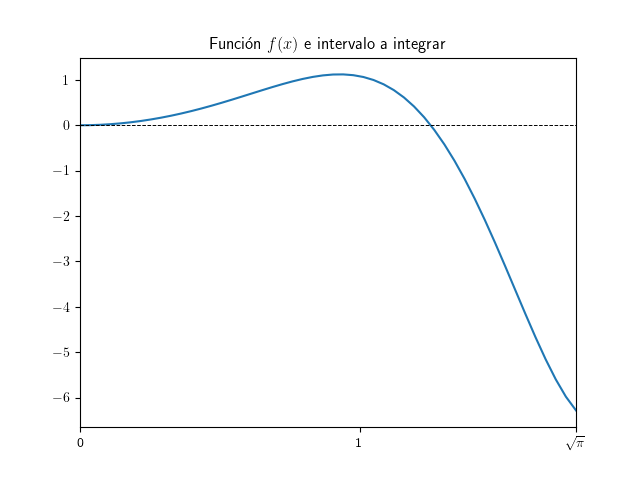

Dado que hay que implementar el código tanto para el método recursivo del trapecio así como el de integración de Romberg, se deja abierto el espacio para que complementen esas funciones en los respectivos módulos.

In [ ]:
def trapecio_recursiva(f, a, b, Iviejo, k):
    pass
    # aqui va el codigo que hay que desarrollar

def romberg(f, a, b, tol=1.0e-6):
    pass
    # aqui va el otro codigo que hay que desarrollar

In [ ]:
# from moduloDiferencias import trapecio_recursiva
# from moduloIntegracion import romberg
import numpy as np

def f(x): return 2.0*(x**2) * np.cos(x**2)

I, n = romberg(f, 0, np.sqrt(np.pi))

print('\nIntegral = {0:1.6f}'.format(I))
print('\nPaneles = {0:}'.format(n))

## Resolviendo el ejercicio con python.

En la presentación anterior ya hemos presentado el uso de la función <code>scipy.integrate.quad</code> para integrar una función.

De la misma librería, tomamos la función <code>scipy.integrate.romberg</code>, que realiza una integración con la técnica de Romberg.

In [ ]:
from numpy import cos, sqrt, pi
from scipy.integrate import romberg

def f(x): return 2.0 * (x**2) * cos(x**2)

resultado = romberg(f, 0, sqrt(pi), show=True)

# Cuadraturas Gaussianas.

Las fórmulas de integración Gaussianas tiene la misma forma de las reglas de Newton-Cotes:
$$
\begin{align*}
I = \sum_{i=0}^{n} A_{i} \, f (x_{i})
\end{align*}
$$
donde $I$ representa la aproximación al valor de la integral, la diferencia radica en la forma en que se determinan los pesos $A_{i}$ y abscisas nodales $x_{i}$.

En la cuadratura de Gauss, se eligen los nodos y los pesos de modo que la ecuación para $I$ es la integral exacta si $f (x)$ es un polinomio de grado $2 \, n + 1$ o menor, es decir:
$$
\begin{align*}
\int_{a}^{b} w(x) \, P_{m} (x) d x = \sum_{i=0}^{n} A_{i} \, P_{m} (x_{i}), \hspace{1cm} m \leq 2 \, n + 1
\end{align*}
$$

Evaluar la integral:
$$
\begin{align*}
\int_{-1}^{1} (1 - x^{2})^{3/2} \; dx
\end{align*}
$$
con la mayor precisión posible, usando una cuadratura Gaussiana.

In [ ]:
from scipy.integrate import quadrature

def g(x): return (1 - x**2)**(3/2)

print('El valor de la integral es I = {0:1.8f}'.format(quadrature(g, -1., 1)[0]))

## Obteniendo las raíces y pesos.

Podemos recuperar las raíces y pesos de las funciones especiales mediante la literatura:
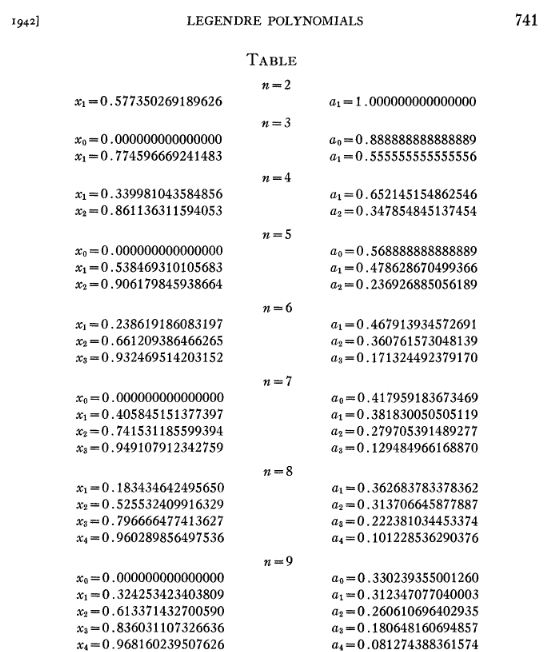

Estos valores de raíces y pesos los podemos recuperar con las funciones de <code>scipy</code>:

In [ ]:
from scipy.special import roots_legendre, eval_legendre
roots, weights = roots_legendre(6)

print('Raíces de los polinomios de Legendre:')
print(roots)

print('\nPesos:')
print(weights)

print('\nEvaluando las raíces en los polinomios de Legendre')
print(eval_legendre(6, roots))